In [2]:
import os 
import seaborn as sns
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import requests
import time
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
load_dotenv()

rent_cast_api_key = os.getenv('API_KEY')

if rent_cast_api_key:
    print("API Key loaded successfully!")
else:
    print("API Key not found. Please check your .env file.")


API Key loaded successfully!


In [4]:
# # Property Records
# # Query Params
# state = 'FL'
# saleDateRange = '365'
# limit = 500  # Max limit per request
# offset = 0    # Starting offset
# total_properties = 145000  # Total number of properties you want
# properties = []  # List to store properties
# url = 'https://api.rentcast.io/v1/properties'

In [5]:
# # Function to get properties
# def get_properties(offset):
#     queryparams = {
#         'state': state,
#         'saleDateRange': saleDateRange,
#         'limit': limit,
#         'offset': offset
#     }
#     headers = {
#         "accept": "application/json",
#         "X-Api-Key": rent_cast_api_key
#     }
    
#     response = requests.get(url, headers=headers, params=queryparams)
    
#     # Check if response is successful
#     if response.status_code == 200:
#         data = response.json()
#         return data  # The response is already a list, so return it directly
#     else:
#         print(f"Error {response.status_code}: {response.text}")
#         return []

In [6]:
# # Loop through requests and get the properties
# while len(properties) < total_properties:
#     print(f"Getting properties: {len(properties)} / {total_properties}")
#     current_properties = get_properties(offset)
    
#     if not current_properties:
#         print("No more properties found.")
#         break
    
#     properties.extend(current_properties) 
#     offset += limit  
    
#     time.sleep(1)

In [7]:
# Read in the .csv file
property_record_one = pd.read_csv('property_record_one.csv')
property_record_two = pd.read_csv('property_record_two.csv')

In [8]:
combined_df = pd.concat([property_record_one, property_record_two], ignore_index=True)


In [9]:
rent_cast_data = combined_df 

In [10]:
print(property_record_one.shape)

(72500, 29)


In [11]:
property_record_one.head()

,id,formattedAddress,addressLine1,addressLine2,city,state,zipCode,county,latitude,longitude,...,zoning,lastSaleDate,lastSalePrice,features,taxAssessments,propertyTaxes,history,owner,ownerOccupied,hoa
0,"2825-Palm-Beach-Blvd,-Apt-417,-Fort-Myers,-FL-...","2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",2825 Palm Beach Blvd,Apt 417,Fort Myers,FL,33916,Lee,26.652413,-81.855762,...,B-1,2024-03-15T00:00:00.000Z,315000.0,"{'architectureType': 'Condo / Apartment', 'flo...","{'2019': {'year': 2019, 'value': 128393, 'impr...","{'2019': {'year': 2019, 'total': 2548}, '2022'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Edgar K Collison', 'Muriel Colliso...",False,NaN
1,"3607-Bridgewood-Dr,-Jacksonville,-FL-32277","3607 Bridgewood Dr, Jacksonville, FL 32277",3607 Bridgewood Dr,NaN,Jacksonville,FL,32277,Duval,30.363895,-81.610043,...,PUD,2024-03-15T00:00:00.000Z,345000.0,"{'cooling': True, 'coolingType': 'Central', 'e...","{'2020': {'year': 2020, 'value': 158286, 'land...","{'2020': {'year': 2020, 'total': 2999}, '2021'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Jessielyn Wade', 'Gregory Wade'], ...",True,NaN
2,"2025-Se-44th-St,-Cape-Coral,-FL-33904","2025 Se 44th St, Cape Coral, FL 33904",2025 Se 44th St,NaN,Cape Coral,FL,33904,Lee,26.568926,-81.932980,...,R1-W,2024-03-15T00:00:00.000Z,850000.0,"{'architectureType': 'Ranch', 'cooling': True,...","{'2023': {'year': 2023, 'value': 848351, 'land...","{'2023': {'year': 2023, 'total': 10682}}","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['D&D PROPERTIES OF CAPE COLE INC'],...",False,NaN
3,"4405-Granada-Blvd,-Coral-Gables,-FL-33146","4405 Granada Blvd, Coral Gables, FL 33146",4405 Granada Blvd,NaN,Coral Gables,FL,33146,Miami-Dade,25.731201,-80.271882,...,"0100:SINGLE FAM,GENERAL",2024-03-15T00:00:00.000Z,4204000.0,"{'exteriorType': 'Concrete Block', 'floorCount...","{'2019': {'year': 2019, 'value': 1580456, 'lan...","{'2019': {'year': 2019, 'total': 30859}, '2022...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['NLU RADIX LLC'], 'type': 'Organiza...",False,NaN
4,"11605-Sw-253rd-St,-Homestead,-FL-33032","11605 Sw 253rd St, Homestead, FL 33032",11605 Sw 253rd St,NaN,Homestead,FL,33032,Miami-Dade,25.532831,-80.379346,...,"3700:MULTI-FAM,10-21 U/A",2024-03-15T00:00:00.000Z,445000.0,{'floorCount': 2},"{'2021': {'year': 2021, 'value': 212001}, '202...","{'2022': {'year': 2022, 'total': 5737}, '2023'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Eliecer Ferrer', 'Anay Diaz'], 'ty...",True,NaN


In [12]:
property_record_two.head()

,id,formattedAddress,addressLine1,addressLine2,city,state,zipCode,county,latitude,longitude,...,zoning,lastSaleDate,lastSalePrice,features,taxAssessments,propertyTaxes,history,owner,ownerOccupied,hoa
0,"7948-Pembroke-Rd,-Miramar,-FL-33023","7948 Pembroke Rd, Miramar, FL 33023",7948 Pembroke Rd,NaN,Miramar,FL,33023,Broward,25.994338,-80.246085,...,RM2,2024-05-24T00:00:00.000Z,330000.0,"{'cooling': True, 'coolingType': 'Central', 'e...","{'2023': {'year': 2023, 'value': 62450}}","{'2023': {'year': 2023, 'total': 1187}}","{'2024-05-24': {'event': 'Sale', 'date': '2024...","{'names': ['Steven Mosley', 'Jacqueline Mosley...",True,NaN
1,"2319-Orchid-Dr,-Davenport,-FL-33837","2319 Orchid Dr, Davenport, FL 33837",2319 Orchid Dr,NaN,Davenport,FL,33837,Polk,28.206452,-81.606291,...,NaN,2024-05-24T00:00:00.000Z,364500.0,NaN,"{'2023': {'year': 2023, 'value': 72000, 'land'...","{'2023': {'year': 2023, 'total': 2719}}","{'2024-05-24': {'event': 'Sale', 'date': '2024...","{'names': ['Andrew Sadlers', 'Elaine Christine...",True,NaN
2,"2388-Orchid-Dr,-Davenport,-FL-33837","2388 Orchid Dr, Davenport, FL 33837",2388 Orchid Dr,NaN,Davenport,FL,33837,Polk,28.206452,-81.605422,...,NaN,2024-05-24T00:00:00.000Z,64842.0,{'viewType': 'Water'},"{'2023': {'year': 2023, 'value': 82000, 'land'...","{'2023': {'year': 2023, 'total': 2850}}","{'2024-05-24': {'event': 'Sale', 'date': '2024...","{'names': ['NVR INC'], 'type': 'Organization',...",False,NaN
3,"3770-Branding-Iron-Bnd,-Saint-Cloud,-FL-34772","3770 Branding Iron Bnd, Saint Cloud, FL 34772",3770 Branding Iron Bnd,NaN,Saint Cloud,FL,34772,Osceola,28.210286,-81.309582,...,NaN,2024-05-24T00:00:00.000Z,565795.0,NaN,"{'2023': {'year': 2023, 'value': 38000, 'land'...","{'2023': {'year': 2023, 'total': 2233}}","{'2024-05-24': {'event': 'Sale', 'date': '2024...","{'names': ['Jose Colon', 'Cynthia Colon'], 'ty...",True,NaN
4,"3902-SE-Fairway-W,-Stuart,-FL-34997","3902 SE Fairway W, Stuart, FL 34997",3902 SE Fairway W,NaN,Stuart,FL,34997,Martin,27.157402,-80.211506,...,NaN,2024-05-24T00:00:00.000Z,540000.0,"{'architectureType': 'Duplex', 'cooling': True...","{'2023': {'year': 2023, 'value': 201603}}","{'2023': {'year': 2023, 'total': 3019}}","{'2024-05-24': {'event': 'Sale', 'date': '2024...","{'names': ['Kenneth R Hatton', 'Grace S Hatton...",False,NaN


In [13]:
print(property_record_two.shape)

(72500, 29)


In [14]:
# conn = sqlite3.connect('property_database.db')  # Conn to SQL database

# # Turning the DataFrames into SQLite tables
# property_record_one.to_sql('property_record_one', conn, if_exists='replace', index=False)
# property_record_two.to_sql('property_record_two', conn, if_exists='replace', index=False)

# # Writing a SQL query to combine both tables
# query = """
#     SELECT * FROM property_record_one
#     UNION ALL
#     SELECT * FROM property_record_two;
# """

# # Converting SQL into a pandas Dataframe
# property_record_data = pd.read_sql(query, conn)

# print(property_record_data.head())

# conn.close()  # Close the connection to the SQLite 

In [15]:
#rent_cast_data = property_record_data

#rent_cast_data.shape

In [16]:
rent_cast_data['history'].head()

0    {'2024-03-15': {'event': 'Sale', 'date': '2024...
1    {'2024-03-15': {'event': 'Sale', 'date': '2024...
2    {'2024-03-15': {'event': 'Sale', 'date': '2024...
3    {'2024-03-15': {'event': 'Sale', 'date': '2024...
4    {'2024-03-15': {'event': 'Sale', 'date': '2024...
Name: history, dtype: object

In [17]:
rent_cast_data['history'].nunique()

84949

In [18]:
rent_cast_data['zoning'].head()

0                         B-1
1                         PUD
2                        R1-W
3     0100:SINGLE FAM,GENERAL
4    3700:MULTI-FAM,10-21 U/A
Name: zoning, dtype: object

In [19]:
rent_cast_data['zoning'].nunique()

1578

In [20]:
rent_cast_data['zoning'].isna().sum()

np.int64(58515)

In [21]:
pd.set_option('display.max_columns', None)

rent_cast_data

,id,formattedAddress,addressLine1,addressLine2,city,state,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,assessorID,legalDescription,subdivision,zoning,lastSaleDate,lastSalePrice,features,taxAssessments,propertyTaxes,history,owner,ownerOccupied,hoa
0,"2825-Palm-Beach-Blvd,-Apt-417,-Fort-Myers,-FL-...","2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",2825 Palm Beach Blvd,Apt 417,Fort Myers,FL,33916,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,18-44-25-P1-03700.0417,ALTA MAR DESC INST#2006-83303 UNIT 417,CITY RIVER DISTRICT,B-1,2024-03-15T00:00:00.000Z,315000.0,"{'architectureType': 'Condo / Apartment', 'flo...","{'2019': {'year': 2019, 'value': 128393, 'impr...","{'2019': {'year': 2019, 'total': 2548}, '2022'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Edgar K Collison', 'Muriel Colliso...",False,NaN
1,"3607-Bridgewood-Dr,-Jacksonville,-FL-32277","3607 Bridgewood Dr, Jacksonville, FL 32277",3607 Bridgewood Dr,NaN,Jacksonville,FL,32277,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,128197-1276,38-58 38-2S-27E MARSH CREEK LOT 138,MARSH CREEK,PUD,2024-03-15T00:00:00.000Z,345000.0,"{'cooling': True, 'coolingType': 'Central', 'e...","{'2020': {'year': 2020, 'value': 158286, 'land...","{'2020': {'year': 2020, 'total': 2999}, '2021'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Jessielyn Wade', 'Gregory Wade'], ...",True,NaN
2,"2025-Se-44th-St,-Cape-Coral,-FL-33904","2025 Se 44th St, Cape Coral, FL 33904",2025 Se 44th St,NaN,Cape Coral,FL,33904,Lee,26.568926,-81.932980,Single Family,3.0,2.0,2050.0,12000.0,1967.0,08-45-24-C3-00369.0550,CAPE CORAL UNIT 7 BLK.369 PB 12 PG 105 LOTS 55...,CAPE CORAL UNIT 7 EAST OF DEL PRADO,R1-W,2024-03-15T00:00:00.000Z,850000.0,"{'architectureType': 'Ranch', 'cooling': True,...","{'2023': {'year': 2023, 'value': 848351, 'land...","{'2023': {'year': 2023, 'total': 10682}}","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['D&D PROPERTIES OF CAPE COLE INC'],...",False,NaN
3,"4405-Granada-Blvd,-Coral-Gables,-FL-33146","4405 Granada Blvd, Coral Gables, FL 33146",4405 Granada Blvd,NaN,Coral Gables,FL,33146,Miami-Dade,25.731201,-80.271882,Single Family,4.0,2.0,5087.0,15779.0,1951.0,03-4119-001-6040,CORAL GABLES COUNTRY CLUB SEC 5 LOTS 13 & 14 &...,CORAL GABLES COUNTRY CLUB SEC PT 5,"0100:SINGLE FAM,GENERAL",2024-03-15T00:00:00.000Z,4204000.0,"{'exteriorType': 'Concrete Block', 'floorCount...","{'2019': {'year': 2019, 'value': 1580456, 'lan...","{'2019': {'year': 2019, 'total': 30859}, '2022...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['NLU RADIX LLC'], 'type': 'Organiza...",False,NaN
4,"11605-Sw-253rd-St,-Homestead,-FL-33032","11605 Sw 253rd St, Homestead, FL 33032",11605 Sw 253rd St,NaN,Homestead,FL,33032,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,30-6030-003-7210,COCO PALM ESTATES PB 171-032 T-22608 LOT 5 BLK...,COCO PALM ESTATES,"3700:MULTI-FAM,10-21 U/A",2024-03-15T00:00:00.000Z,445000.0,{'floorCount': 2},"{'2021': {'year': 2021, 'value': 212001}, '202...","{'2022': {'year': 2022, 'total': 5737}, '2023'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Eliecer Ferrer', 'Anay Diaz'], 'ty...",True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144995,"403-Britten-Dr,-Kissimmee,-FL-34758","403 Britten Dr, Kissimmee, FL 34758",403 Britten Dr,NaN,Kissimmee,FL,34758,Osceola,28.155866,-81.492941,Single Family,4.0,2.0,2081.0,8494.0,2004.0,252628611213140020,POINCIANA V 2 NBD 3 PB 3 PG 117 BLK 1314 LOT 2...,POINC VLG 2 NBD 3,OPUD,2025-01-27T00:00:00.000Z,210000.0,"{'cooling': True, 'coolingType': 'Package', 'e...","{'2022': {'year': 2022, 'value': 80959}, '2023...","{'2022': {'year': 2022, 'total': 979}, '2023':...","{'2005-06-02': {'event': 'Sale', 'date': '2005...","{'names': ['Pablo Ocasio'], 'type': 'Individua..

In [22]:
rent_cast_data.columns

Index(['id', 'formattedAddress', 'addressLine1', 'addressLine2', 'city',
       'state', 'zipCode', 'county', 'latitude', 'longitude', 'propertyType',
       'bedrooms', 'bathrooms', 'squareFootage', 'lotSize', 'yearBuilt',
       'assessorID', 'legalDescription', 'subdivision', 'zoning',
       'lastSaleDate', 'lastSalePrice', 'features', 'taxAssessments',
       'propertyTaxes', 'history', 'owner', 'ownerOccupied', 'hoa'],
      dtype='object')

In [23]:
rent_cast_data['lastSaleDate'] = pd.to_datetime(rent_cast_data['lastSaleDate'], errors='coerce')

rent_cast_data['month_year'] = rent_cast_data['lastSaleDate'].dt.to_period('M')

unique_sales_per_month = rent_cast_data.groupby('month_year').size()

print(unique_sales_per_month)

month_year
2024-03    14825
2024-04    32342
2024-05    31730
2024-06    27456
2024-07    21465
2024-08     3971
2024-09     2924
2024-10     3018
2024-11     2795
2024-12     2749
2025-01     1725
Freq: M, dtype: int64


/tmp/ipykernel_5932/2463849507.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  rent_cast_data['month_year'] = rent_cast_data['lastSaleDate'].dt.to_period('M')


In [24]:
number_of_nunique_cities = rent_cast_data['city'].nunique()
print(f'Number of unique cities are: {number_of_nunique_cities}')

Number of unique cities are: 578


In [25]:
number_of_nunique_propertytype = rent_cast_data['propertyType'].nunique()
print(f'Number of unique property type are: {number_of_nunique_propertytype}')

unique_propertytypes = rent_cast_data['propertyType'].unique()
print(f'The nunique property are:  {unique_propertytypes}')

Number of unique property type are: 7
The nunique property are:  ['Condo' 'Single Family' 'Townhouse' 'Land' 'Multi-Family' 'Manufactured'
 nan 'Apartment']


In [26]:
property_type_counts = rent_cast_data['propertyType'].value_counts()

property_type_counts_sorted = property_type_counts.sort_values(ascending=False)

print("Number of properties sold for each propertyType (from greatest to least):")
print(property_type_counts_sorted)

Number of properties sold for each propertyType (from greatest to least):
propertyType
Single Family    99981
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2397
Townhouse         1732
Apartment          551
Name: count, dtype: int64


In [27]:
# Step 1: Filter the data for 'Multi-Family' properties
multi_family_data = rent_cast_data[rent_cast_data['propertyType'] == 'Multi-Family']

# Step 2: Remove extreme outliers using the IQR method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = multi_family_data['lastSalePrice'].quantile(0.25)
Q3 = multi_family_data['lastSalePrice'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers based on IQR
multi_family_data_filtered = multi_family_data[(multi_family_data['lastSalePrice'] >= lower_bound) & 
                                               (multi_family_data['lastSalePrice'] <= upper_bound)]

# Step 3: Handle extreme values manually (capping at a reasonable threshold)
max_price_threshold = 10000000  # Capping max price at $10 million

# Apply manual filtering for extreme outliers above the threshold
multi_family_data_filtered = multi_family_data_filtered[multi_family_data_filtered['lastSalePrice'] <= max_price_threshold]

# Step 4: Define the price bins for more reasonable ranges
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 500000, 1000000, 5000000, 10000000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-500k', '500k-1M', '1M-5M', '5M-10M']

# Step 5: Create a new column for the price range category
multi_family_data_filtered['PriceRange'] = pd.cut(multi_family_data_filtered['lastSalePrice'], bins=bins, labels=labels)

# Step 6: Update the original rent_cast_data with the cleaned multi-family data
# Replace the original multi-family data with the filtered one
rent_cast_data.loc[rent_cast_data['propertyType'] == 'Multi-Family', :] = multi_family_data_filtered

# Step 7: Verify the update
print(f"Updated Multi-Family Data with Price Range Categories:\n{multi_family_data_filtered.head()}")


Updated Multi-Family Data with Price Range Categories:
                                             id  \
37     19213-Tangerine-Rd,-Fort-Myers,-FL-33967   
40       114-Christie-Ln,-Panama-City,-FL-32404   
53    11888-N-Glenview-Ave,-Dunnellon,-FL-34433   
105         405-E-4th-St,-Panama-City,-FL-32401   
210  2821-Midnight-Pearl-Dr,-Sarasota,-FL-34240   

                               formattedAddress            addressLine1  \
37     19213 Tangerine Rd, Fort Myers, FL 33967      19213 Tangerine Rd   
40       114 Christie Ln, Panama City, FL 32404         114 Christie Ln   
53    11888 N Glenview Ave, Dunnellon, FL 34433    11888 N Glenview Ave   
105         405 E 4th St, Panama City, FL 32401            405 E 4th St   
210  2821 Midnight Pearl Dr, Sarasota, FL 34240  2821 Midnight Pearl Dr   

    addressLine2         city state  zipCode    county   latitude  longitude  \
37           NaN   Fort Myers    FL    33967       Lee  26.457837 -81.797473   
40           NaN  Panama Ci

In [28]:
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    99981
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2189
Townhouse         1732
Apartment          551
Name: count, dtype: int64

In [29]:
# Step 1: Filter the data for 'Single Family' properties
single_family_data = rent_cast_data[rent_cast_data['propertyType'] == 'Single Family']

# Step 2: Remove extreme outliers using the IQR method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = single_family_data['lastSalePrice'].quantile(0.25)
Q3 = single_family_data['lastSalePrice'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers based on IQR
single_family_data_filtered = single_family_data[(single_family_data['lastSalePrice'] >= lower_bound) & 
                                                 (single_family_data['lastSalePrice'] <= upper_bound)]

# Step 3: Handle extreme values manually (capping at a reasonable threshold)
max_price_threshold = 1000000  # Capping max price at $1 million

# Apply manual filtering for extreme outliers above the threshold
single_family_data_filtered = single_family_data_filtered[single_family_data_filtered['lastSalePrice'] <= max_price_threshold]

# Step 4: Define the price bins for more reasonable ranges
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 500000, 1000000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-500k', '500k-1M']

# Step 5: Create a new column for the price range category
single_family_data_filtered['PriceRange'] = pd.cut(single_family_data_filtered['lastSalePrice'], bins=bins, labels=labels)

# Step 6: Update the original rent_cast_data with the cleaned single-family data
# Replace the original single-family data with the filtered one
rent_cast_data.loc[rent_cast_data['propertyType'] == 'Single Family', :] = single_family_data_filtered

# Step 7: Verify the update
print(f"Updated Single Family Data with Price Range Categories:\n{single_family_data_filtered.head()}")


Updated Single Family Data with Price Range Categories:
                                           id  \
1  3607-Bridgewood-Dr,-Jacksonville,-FL-32277   
2       2025-Se-44th-St,-Cape-Coral,-FL-33904   
4      11605-Sw-253rd-St,-Homestead,-FL-33032   
6      1525-Larue-Ave,-Jacksonville,-FL-32207   
8        2118-Estevez-Dr,-Lady-Lake,-FL-32159   

                             formattedAddress        addressLine1  \
1  3607 Bridgewood Dr, Jacksonville, FL 32277  3607 Bridgewood Dr   
2       2025 Se 44th St, Cape Coral, FL 33904     2025 Se 44th St   
4      11605 Sw 253rd St, Homestead, FL 33032   11605 Sw 253rd St   
6      1525 Larue Ave, Jacksonville, FL 32207      1525 Larue Ave   
8        2118 Estevez Dr, Lady Lake, FL 32159     2118 Estevez Dr   

  addressLine2          city state  zipCode      county   latitude  longitude  \
1          NaN  Jacksonville    FL  32277.0       Duval  30.363895 -81.610043   
2          NaN    Cape Coral    FL  33904.0         Lee  26.568926 -81.9

In [30]:
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    91796
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2189
Townhouse         1732
Apartment          551
Name: count, dtype: int64

In [31]:
import pandas as pd

# Step 1: Filter the data for 'Apartment' properties
apartment_data = rent_cast_data[rent_cast_data['propertyType'] == 'Apartment']

# Step 2: Remove extreme outliers using the IQR method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = apartment_data['lastSalePrice'].quantile(0.25)
Q3 = apartment_data['lastSalePrice'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers based on IQR
apartment_data_filtered = apartment_data[(apartment_data['lastSalePrice'] >= lower_bound) & 
                                         (apartment_data['lastSalePrice'] <= upper_bound)]

# Step 3: Handle extreme values manually (capping at a reasonable threshold)
max_price_threshold = 5000000  # Capping max price at $5 million

# Apply manual filtering for extreme outliers above the threshold
apartment_data_filtered = apartment_data_filtered[apartment_data_filtered['lastSalePrice'] <= max_price_threshold]

# Step 4: Define the price bins for more reasonable ranges
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 500000, 1000000, 5000000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-500k', '500k-1M', '1M-5M']

# Step 5: Create a new column for the price range category
apartment_data_filtered['PriceRange'] = pd.cut(apartment_data_filtered['lastSalePrice'], bins=bins, labels=labels)

# Step 6: Update the original rent_cast_data with the cleaned apartment data
# Replace the original apartment data with the filtered one
rent_cast_data.loc[rent_cast_data['propertyType'] == 'Apartment', :] = apartment_data_filtered

# Step 7: Verify the update
print(f"Updated Apartment Data with Price Range Categories:\n{apartment_data_filtered.head()}")


Updated Apartment Data with Price Range Categories:
                                                    id  \
267          805-81st-St,-Apt-1,-Miami-Beach,-FL-33141   
268          805-81st-St,-Apt-2,-Miami-Beach,-FL-33141   
414             504-Chelsee-Way,-Lake-Placid,-FL-33852   
1979               102-Fountain-Cv,-Leesburg,-FL-34748   
2942  1001-Ne-8th-Ave,-Apt-204,-Delray-Beach,-FL-33483   

                                      formattedAddress     addressLine1  \
267          805 81st St, Apt 1, Miami Beach, FL 33141      805 81st St   
268          805 81st St, Apt 2, Miami Beach, FL 33141      805 81st St   
414             504 Chelsee Way, Lake Placid, FL 33852  504 Chelsee Way   
1979               102 Fountain Cv, Leesburg, FL 34748  102 Fountain Cv   
2942  1001 Ne 8th Ave, Apt 204, Delray Beach, FL 33483  1001 Ne 8th Ave   

     addressLine2          city state  zipCode      county   latitude  \
267         Apt 1   Miami Beach    FL  33141.0  Miami-Dade  25.866934   
26

In [32]:
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    91796
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2189
Townhouse         1732
Apartment          462
Name: count, dtype: int64

In [33]:
import pandas as pd

# Step 1: Filter the data for 'Land' properties
land_data = rent_cast_data[rent_cast_data['propertyType'] == 'Land']

# Step 2: Remove extreme outliers using the IQR method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = land_data['lastSalePrice'].quantile(0.25)
Q3 = land_data['lastSalePrice'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers based on IQR
land_data_filtered = land_data[(land_data['lastSalePrice'] >= lower_bound) & 
                                (land_data['lastSalePrice'] <= upper_bound)]

# Step 3: Handle extreme values manually (capping at a reasonable threshold)
max_price_threshold = 50000000  # Capping max price at $50 million

# Apply manual filtering for extreme outliers above the threshold
land_data_filtered = land_data_filtered[land_data_filtered['lastSalePrice'] <= max_price_threshold]

# Step 4: Define the price bins for more reasonable ranges
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 500000, 1000000, 5000000, 50000000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', 
          '300k-500k', '500k-1M', '1M-5M', '5M-50M']

# Step 5: Create a new column for the price range category
land_data_filtered['PriceRange'] = pd.cut(land_data_filtered['lastSalePrice'], bins=bins, labels=labels)

# Step 6: Update the original rent_cast_data with the cleaned land data
# Replace the original land data with the filtered one
rent_cast_data.loc[rent_cast_data['propertyType'] == 'Land', :] = land_data_filtered

# Step 7: Verify the update
print(f"Updated Land Data with Price Range Categories:\n{land_data_filtered.head()}")


Updated Land Data with Price Range Categories:
                                         id  \
24     1505-Southwest-Rd,-Sanford,-FL-32771   
31   8603-N-15th-St,-Apt-A,-Tampa,-FL-33604   
52     11619-N-Bass-Rd,-Dunnellon,-FL-34433   
94    7615-Excitement-Dr,-Reunion,-FL-34747   
101      12090-74th-Ave,-Seminole,-FL-33772   

                           formattedAddress        addressLine1 addressLine2  \
24     1505 Southwest Rd, Sanford, FL 32771   1505 Southwest Rd          NaN   
31   8603 N 15th St, Apt A, Tampa, FL 33604      8603 N 15th St        Apt A   
52     11619 N Bass Rd, Dunnellon, FL 34433     11619 N Bass Rd          NaN   
94    7615 Excitement Dr, Reunion, FL 34747  7615 Excitement Dr          NaN   
101      12090 74th Ave, Seminole, FL 33772      12090 74th Ave          NaN   

          city state  zipCode        county   latitude  longitude  \
24     Sanford    FL  32771.0      Seminole  28.798091 -81.289133   
31       Tampa    FL  33604.0  Hillsborough  28.028

In [34]:
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    91796
Condo            22428
Land             10859
Manufactured      3772
Multi-Family      2189
Townhouse         1732
Apartment          462
Name: count, dtype: int64

In [35]:
rent_cast_data.shape

(145000, 30)

In [36]:
rent_cast_data.isnull().sum().sort_values(ascending=False)

hoa                 134750
addressLine2        121465
zoning               64964
features             40672
subdivision          34707
bedrooms             27322
yearBuilt            26375
lotSize              26227
bathrooms            25766
squareFootage        23599
propertyTaxes        23170
owner                22374
ownerOccupied        22374
legalDescription     22241
assessorID           22123
taxAssessments       22008
history              18713
propertyType         11762
county                9530
lastSalePrice         9426
city                  9420
state                 9420
latitude              9420
zipCode               9420
longitude             9420
id                    9420
formattedAddress      9420
addressLine1          9420
lastSaleDate          9420
month_year            9420
dtype: int64

In [37]:
rent_cast_data.isnull().mean().sort_values(ascending=False) * 100

hoa                 92.931034
addressLine2        83.768966
zoning              44.802759
features            28.049655
subdivision         23.935862
bedrooms            18.842759
yearBuilt           18.189655
lotSize             18.087586
bathrooms           17.769655
squareFootage       16.275172
propertyTaxes       15.979310
owner               15.430345
ownerOccupied       15.430345
legalDescription    15.338621
assessorID          15.257241
taxAssessments      15.177931
history             12.905517
propertyType         8.111724
county               6.572414
lastSalePrice        6.500690
city                 6.496552
state                6.496552
latitude             6.496552
zipCode              6.496552
longitude            6.496552
id                   6.496552
formattedAddress     6.496552
addressLine1         6.496552
lastSaleDate         6.496552
month_year           6.496552
dtype: float64

In [38]:
rent_cast_data.duplicated().sum()

np.int64(9421)

In [39]:
rent_cast_data.drop_duplicates(inplace=True)

In [40]:
rent_cast_data.shape

(135579, 30)

In [41]:
rent_cast_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135579 entries, 0 to 144999
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   id                135578 non-null  object             
 1   formattedAddress  135578 non-null  object             
 2   addressLine1      135578 non-null  object             
 3   addressLine2      23535 non-null   object             
 4   city              135578 non-null  object             
 5   state             135578 non-null  object             
 6   zipCode           135578 non-null  float64            
 7   county            135468 non-null  object             
 8   latitude          135578 non-null  float64            
 9   longitude         135578 non-null  float64            
 10  propertyType      133236 non-null  object             
 11  bedrooms          117676 non-null  float64            
 12  bathrooms         119232 non-null  float64       

In [42]:
rent_cast_data.shape

(135579, 30)

In [43]:
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    91794
Condo            22428
Land             10859
Manufactured      3772
Multi-Family      2189
Townhouse         1732
Apartment          462
Name: count, dtype: int64

In [44]:
# Group by 'propertyType' and get summary statistics for 'lastSalePrice'
rent_cast_data.groupby('propertyType')['lastSalePrice'].describe()


,count,mean,std,min,25%,50%,75%,max
propertyType,,,,,,,,
Apartment,462.0,5.930217e+05,5.882241e+05,5000.0,200000.0,370000.0,749750.0,2943750.0
Condo,22425.0,4.862381e+05,2.554767e+06,310.0,185000.0,280000.0,465600.0,345000000.0
Land,10859.0,3.483895e+05,2.370149e+05,510.0,125000.0,355998.0,482832.5,1089700.0
Manufactured,3772.0,1.822608e+05,5.387799e+05,600.0,94000.0,150000.0,209600.0,22500000.0
Multi-Family,2189.0,4.878665e+05,2.401201e+05,6000.0,320000.0,449000.0,620000.0,1255000.0
Single Family,91794.0,4.073113e+05,1.897991e+05,300.0,285000.0,379990.0,511000.0,982500.0
Townhouse,1729.0,1.014355e+06,3.708900e+06,410.0,256000.0,345800.0,479900.0,35714286.0


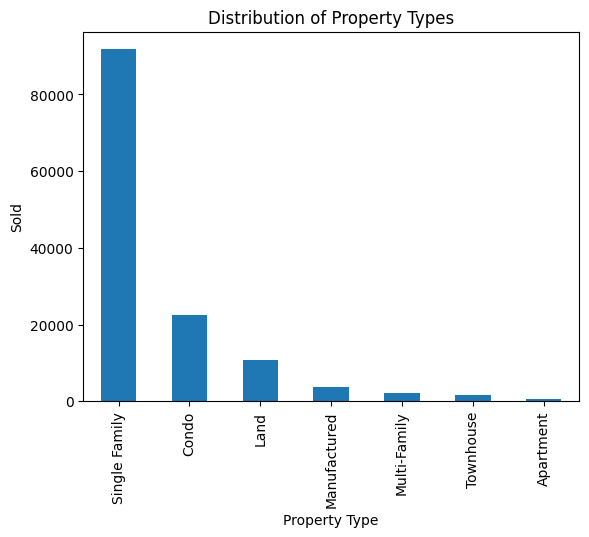

In [45]:
import matplotlib.pyplot as plt

# Create a bar plot of property types
rent_cast_data['propertyType'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Sold')
plt.show()

In [46]:
rent_cast_data.describe()

,zipCode,latitude,longitude,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSalePrice
count,135578.000000,135578.000000,135578.000000,117676.000000,119232.000000,121399.000000,1.187710e+05,118623.000000,1.355720e+05
mean,33470.094086,27.898255,-81.725649,2.924216,2.101500,1628.138304,4.593665e+04,1990.219780,4.527171e+05
std,809.168007,1.360220,1.323194,2.177589,2.898221,1146.565735,2.560545e+06,24.261202,1.343884e+06
min,32003.000000,24.548661,-87.510316,0.000000,0.500000,1.000000,1.000000e+00,202.000000,3.000000e+02
25%,32825.000000,26.678759,-82.333427,2.000000,2.000000,1183.000000,5.521000e+03,1974.000000,2.500000e+05
50%,33541.000000,27.976532,-81.681432,3.000000,2.000000,1542.000000,7.841000e+03,1990.000000,3.610000e+05
75%,33993.000000,28.721903,-80.727036,3.000000,2.000000,1938.000000,1.089000e+04,2007.000000,5.075000e+05
max,34997.000000,30.992581,-80.032459,486.000000,324.000000,277454.000000,6.000000e+08,2028.000000,3.450000e+08


In [47]:
rent_cast_data.columns

Index(['id', 'formattedAddress', 'addressLine1', 'addressLine2', 'city',
       'state', 'zipCode', 'county', 'latitude', 'longitude', 'propertyType',
       'bedrooms', 'bathrooms', 'squareFootage', 'lotSize', 'yearBuilt',
       'assessorID', 'legalDescription', 'subdivision', 'zoning',
       'lastSaleDate', 'lastSalePrice', 'features', 'taxAssessments',
       'propertyTaxes', 'history', 'owner', 'ownerOccupied', 'hoa',
       'month_year'],
      dtype='object')

In [48]:
rent_cast_data

,id,formattedAddress,addressLine1,addressLine2,city,state,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,assessorID,legalDescription,subdivision,zoning,lastSaleDate,lastSalePrice,features,taxAssessments,propertyTaxes,history,owner,ownerOccupied,hoa,month_year
0,"2825-Palm-Beach-Blvd,-Apt-417,-Fort-Myers,-FL-...","2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",2825 Palm Beach Blvd,Apt 417,Fort Myers,FL,33916.0,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,18-44-25-P1-03700.0417,ALTA MAR DESC INST#2006-83303 UNIT 417,CITY RIVER DISTRICT,B-1,2024-03-15 00:00:00+00:00,315000.0,"{'architectureType': 'Condo / Apartment', 'flo...","{'2019': {'year': 2019, 'value': 128393, 'impr...","{'2019': {'year': 2019, 'total': 2548}, '2022'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Edgar K Collison', 'Muriel Colliso...",False,NaN,2024-03
1,"3607-Bridgewood-Dr,-Jacksonville,-FL-32277","3607 Bridgewood Dr, Jacksonville, FL 32277",3607 Bridgewood Dr,NaN,Jacksonville,FL,32277.0,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,128197-1276,38-58 38-2S-27E MARSH CREEK LOT 138,MARSH CREEK,PUD,2024-03-15 00:00:00+00:00,345000.0,"{'cooling': True, 'coolingType': 'Central', 'e...","{'2020': {'year': 2020, 'value': 158286, 'land...","{'2020': {'year': 2020, 'total': 2999}, '2021'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Jessielyn Wade', 'Gregory Wade'], ...",True,NaN,2024-03
2,"2025-Se-44th-St,-Cape-Coral,-FL-33904","2025 Se 44th St, Cape Coral, FL 33904",2025 Se 44th St,NaN,Cape Coral,FL,33904.0,Lee,26.568926,-81.932980,Single Family,3.0,2.0,2050.0,12000.0,1967.0,08-45-24-C3-00369.0550,CAPE CORAL UNIT 7 BLK.369 PB 12 PG 105 LOTS 55...,CAPE CORAL UNIT 7 EAST OF DEL PRADO,R1-W,2024-03-15 00:00:00+00:00,850000.0,"{'architectureType': 'Ranch', 'cooling': True,...","{'2023': {'year': 2023, 'value': 848351, 'land...","{'2023': {'year': 2023, 'total': 10682}}","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['D&D PROPERTIES OF CAPE COLE INC'],...",False,NaN,2024-03
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,"11605-Sw-253rd-St,-Homestead,-FL-33032","11605 Sw 253rd St, Homestead, FL 33032",11605 Sw 253rd St,NaN,Homestead,FL,33032.0,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,30-6030-003-7210,COCO PALM ESTATES PB 171-032 T-22608 LOT 5 BLK...,COCO PALM ESTATES,"3700:MULTI-FAM,10-21 U/A",2024-03-15 00:00:00+00:00,445000.0,{'floorCount': 2},"{'2021': {'year': 2021, 'value': 212001}, '202...","{'2022': {'year': 2022, 'total': 5737}, '2023'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Eliecer Ferrer', 'Anay Diaz'], 'ty...",True,NaN,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144995,"403-Britten-Dr,-Kissimmee,-FL-34758","403 Britten Dr, Kissimmee, FL 34758",403 Britten Dr,NaN,Kissimmee,FL,34758.0,Osceola,28.155866,-81.492941,Single Family,4.0,2.0,2081.0,8494.0,2004.0,252628611213140020,POINCIANA V 2 NBD 3 PB 3 PG 117 BLK 1314 LOT 2...,POINC VLG 2 NBD 3,OPUD,2025-01-27 00:00:00+00:00,210000.0,"{'cooling': True, 'coolingType': 'Package', 'e...","{'2022': {'year': 2022, 'value': 80959}, '2023...","{'2022': {'year': 2022, 'total': 979}, '2023':...","{'2005-06-02': {'event': 'Sale', 'date': '2005...","{'names': ['Pablo Ocasio'], 'type': 'Individua...",True,{'fee': 85},2025-01
144996,"924-Hickory-Ave,-Inverness,-FL-34452","924 Hickory Ave, Inverness, FL 34452",924 Hickory Ave,NaN,Inverness,FL,34452.0,Citrus,28.820363,-82.326348,Single Family,2.0,2.0,1211.0,14400.0,1988.0,20E-19S-21-0020-02280-018.0,INVERNESS HGLDS SOUTH PB 3 PG 51 LOTS 18 19 & ...,INVERNESS HIGHLANDS SOUTH,MDR MED DENSITY RESIDENT,2025-01-27 00:00:00+00:00,200000.0,"{'cooling': True, 'coolingType': 'Commercial',...","{'2022': {'year'

In [49]:
#rent_cast_data_flattened = pd.json_normalize(rent_cast_data.to_dict(orient='records'), sep='_')

# Converting rent_cast_data_flattened back to rent_cast_data
#rent_cast_data_flattened.head()


In [50]:
#rent_cast_data_flattened = rent_cast_data

In [51]:
rent_cast_data.shape

(135579, 30)

In [52]:
rent_cast_data.columns


Index(['id', 'formattedAddress', 'addressLine1', 'addressLine2', 'city',
       'state', 'zipCode', 'county', 'latitude', 'longitude', 'propertyType',
       'bedrooms', 'bathrooms', 'squareFootage', 'lotSize', 'yearBuilt',
       'assessorID', 'legalDescription', 'subdivision', 'zoning',
       'lastSaleDate', 'lastSalePrice', 'features', 'taxAssessments',
       'propertyTaxes', 'history', 'owner', 'ownerOccupied', 'hoa',
       'month_year'],
      dtype='object')

In [53]:
# Drop the columns that are not useful for predicting price
columns_to_drop = [
    'id', 'assessorID', 'legalDescription', 'subdivision', 'owner', 'ownerOccupied', 'formattedAddress',
      'addressLine1', 'addressLine2'
]

rent_cast_data = rent_cast_data.drop(columns=columns_to_drop)

print(rent_cast_data.head())

           city state  zipCode      county   latitude  longitude  \
0    Fort Myers    FL  33916.0         Lee  26.652413 -81.855762   
1  Jacksonville    FL  32277.0       Duval  30.363895 -81.610043   
2    Cape Coral    FL  33904.0         Lee  26.568926 -81.932980   
3           NaN   NaN      NaN         NaN        NaN        NaN   
4     Homestead    FL  33032.0  Miami-Dade  25.532831 -80.379346   

    propertyType  bedrooms  bathrooms  squareFootage  lotSize  yearBuilt  \
0          Condo       2.0        2.0         1003.0  44417.0     2006.0   
1  Single Family       3.0        2.0         1921.0   4464.0     1992.0   
2  Single Family       3.0        2.0         2050.0  12000.0     1967.0   
3            NaN       NaN        NaN            NaN      NaN        NaN   
4  Single Family       3.0        2.5         1740.0   1870.0     2016.0   

                     zoning              lastSaleDate  lastSalePrice  \
0                       B-1 2024-03-15 00:00:00+00:00       31

In [54]:
rent_cast_data.shape

(135579, 21)

In [55]:
rent_cast_data['lastSaleDate'] = pd.to_datetime(rent_cast_data['lastSaleDate'])

rent_cast_data['year_month'] = rent_cast_data['lastSaleDate'].dt.to_period('M')

m_rate = {
  '2022-01': 0.6622, '2022-02': 0.6699, '2022-03': 0.6609, '2022-04': 0.6266,
    '2022-05': 0.5906, '2022-06': 0.5736, '2022-07': 0.5544, '2022-08': 0.5483,
    '2022-09': 0.5644, '2022-10': 0.6466, '2022-11': 0.6628, '2022-12': 0.6694,
    '2023-01': 0.6734, '2023-02': 0.6980, '2023-03': 0.6832, '2023-04': 0.7453,
   '2023-05': 0.7745, '2023-06': 0.8003, '2023-07': 0.8187, '2023-08': 0.8346,
   '2023-09': 0.8684, '2023-10': 0.8684
}

rent_cast_data['year_month'] = rent_cast_data['year_month'].dt.strftime('%Y-%m')

rent_cast_data['m_rate'] = rent_cast_data['year_month'].map(m_rate)


/tmp/ipykernel_5932/477459080.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  rent_cast_data['year_month'] = rent_cast_data['lastSaleDate'].dt.to_period('M')


In [56]:
rent_cast_data.shape

(135579, 23)

In [57]:
rent_cast_data.columns


Index(['city', 'state', 'zipCode', 'county', 'latitude', 'longitude',
       'propertyType', 'bedrooms', 'bathrooms', 'squareFootage', 'lotSize',
       'yearBuilt', 'zoning', 'lastSaleDate', 'lastSalePrice', 'features',
       'taxAssessments', 'propertyTaxes', 'history', 'hoa', 'month_year',
       'year_month', 'm_rate'],
      dtype='object')

In [58]:
rent_cast_data.head()

,city,state,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,zoning,lastSaleDate,lastSalePrice,features,taxAssessments,propertyTaxes,history,hoa,month_year,year_month,m_rate
0,Fort Myers,FL,33916.0,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,B-1,2024-03-15 00:00:00+00:00,315000.0,"{'architectureType': 'Condo / Apartment', 'flo...","{'2019': {'year': 2019, 'value': 128393, 'impr...","{'2019': {'year': 2019, 'total': 2548}, '2022'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...",NaN,2024-03,2024-03,NaN
1,Jacksonville,FL,32277.0,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,PUD,2024-03-15 00:00:00+00:00,345000.0,"{'cooling': True, 'coolingType': 'Central', 'e...","{'2020': {'year': 2020, 'value': 158286, 'land...","{'2020': {'year': 2020, 'total': 2999}, '2021'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...",NaN,2024-03,2024-03,NaN
2,Cape Coral,FL,33904.0,Lee,26.568926,-81.932980,Single Family,3.0,2.0,2050.0,12000.0,1967.0,R1-W,2024-03-15 00:00:00+00:00,850000.0,"{'architectureType': 'Ranch', 'cooling': True,...","{'2023': {'year': 2023, 'value': 848351, 'land...","{'2023': {'year': 2023, 'total': 10682}}","{'2024-03-15': {'event': 'Sale', 'date': '2024...",NaN,2024-03,2024-03,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,Homestead,FL,33032.0,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,"3700:MULTI-FAM,10-21 U/A",2024-03-15 00:00:00+00:00,445000.0,{'floorCount': 2},"{'2021': {'year': 2021, 'value': 212001}, '202...","{'2022': {'year': 2022, 'total': 5737}, '2023'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...",NaN,2024-03,2024-03,NaN


In [59]:
rent_cast_data['zipCode'] = pd.to_numeric(rent_cast_data['zipCode'], errors='coerce').fillna(0).astype(int)

In [60]:
# # Use sparse matrix for one-hot encoding
# rent_cast_data_dummies = pd.get_dummies(
#     rent_cast_data[['city', 'state', 'zipCode', 'county', 'propertyType', 'zoning']], #history
#     sparse=True
# )

# # Check the result
# rent_cast_data_dummies.head()


In [61]:
rent_cast_data['lastSalePrice'].fillna(rent_cast_data['lastSalePrice'].mean(), inplace=True)


/tmp/ipykernel_5932/4242766746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rent_cast_data['lastSalePrice'].fillna(rent_cast_data['lastSalePrice'].mean(), inplace=True)


In [62]:
# Correct way to select multiple columns
cols = [
    'city',
    'zipCode',
    'county',
    'propertyType',
    # 'history',
    # 'zoning',
    'lastSalePrice'
]
rent_cast_data = pd.get_dummies(
    rent_cast_data[cols]
)

# Check the result
rent_cast_data.head()


,zipCode,lastSalePrice,city_Alachua,city_Alford,city_Altamonte Springs,city_Altha,city_Altoona,city_Alva,city_Amelia Island,city_Anna Maria,city_Anthony,city_Apalachicola,city_Apollo Beach,city_Apopka,city_Arcadia,city_Archer,city_Astatula,city_Astor,city_Atlantic Beach,city_Atlantis,city_Auburndale,city_Ave Maria,city_Aventura,city_Avon Park,city_Azalea Park,city_Babcock Ranch,city_Babson Park,city_Bagdad,city_Baker,city_Bal Harbour,city_Baldwin,city_Barefoot Bay,city_Bartow,city_Bascom,city_Basinger,city_Bay Harbor Islands,city_Bell,city_Bella Collina,city_Bellair Meadowbrook Terrace,city_Belle Glade,city_Belle Isle,city_Belleair,city_Belleair Beach,city_Belleair Bluffs,city_Belleview,city_Bellview,city_Beverly Hills,city_Big Pine Key,city_Biscayne Park,city_Blountstown,city_Boca Grande,city_Boca Raton,city_Bokeelia,city_Bonifay,city_Bonita Springs,city_Bowling Green,city_Boynton Beach,city_Bradenton,city_Bradenton Beach,city_Brandon,city_Branford,city_Bristol,city_Bronson,city_Brooker,city_Brooksville,city_Bryceville,city_Bunnell,city_Bushnell,city_Callahan,city_Canal Point,city_Cantonment,city_Cape Canaveral,city_Cape Coral,city_Captiva,city_Carrabelle,city_Caryville,city_Casselberry,city_Cedar Key,city_Celebration,city_Center Hill,city_Century,city_Champions Gate,city_Chiefland,city_Chipley,city_Chokoloskee,city_Christmas,city_Chuluota,city_Citra,city_Citrus Springs,city_Clearwater,city_Clearwater Beach,city_Clermont,city_Clewiston,city_Cocoa,city_Cocoa Beach,city_Coconut Creek,city_Coconut Grove,city_Coleman,city_Cooper City,city_Coral Gables,city_Coral Springs,city_Coral Terrace,city_Cortez,city_Cottondale,city_Crawfordville,city_Crescent City,city_Crestview,city_Cross City,city_Crystal Beach,city_Crystal River,city_Cudjoe Key,city_Cutler Bay,city_Dade City,city_Dania,city_Dania Beach,city_Davenport,city_Davie,city_Daytona Beach,city_Daytona Beach Shores,city_De Leon Springs,city_Debary,city_Deer Island,city_Deerfield Beach,city_Defuniak Springs,city_Deland,city_Delray Beach,city_Deltona,city_Destin,city_Doral,city_Dover,city_Duette,city_Dundee,city_Dunedin,city_Dunnellon,city_Eagle Lake,city_East Palatka,city_Eastpoint,city_Eaton Park,city_Eatonville,city_Ebro,city_Edgewater,city_El Portal,city_Elkton,city_Ellenton,city_Englewood,city_Estero,city_Eustis,city_Everglades City,city_Fanning Springs,city_Fellsmere,city_Fern Park,city_Fernandina Beach,city_Flagler Beach,city_Fleming Island,city_Florahome,city_Floral City,city_Florida City,city_Forest City,city_Fort Denaud,city_Fort Lauderdale,city_Fort Mc Coy,city_Fort Mccoy,city_Fort Meade,city_Fort Myers,city_Fort Myers Beach,city_Fort Pierce,city_Fort Walton Beach,city_Fort White,city_Fountain,city_Freeport,city_Frostproof,city_Fruitland Park,city_Gainesville,city_Geneva,city_Georgetown,city_Gibsonton,city_Gladeview,city_Glen Saint Mary,city_Gotha,city_Graceville,city_Grand Island,city_Grant,city_Grant Valkaria,city_Green Cove Springs,city_Greenacres,city_Greenville,city_Groveland,city_Gulf Breeze,city_Gulfport,city_Haines City,city_Hallandale,city_Hallandale Beach,city_Hampton,city_Harmony,city_Hastings,city_Havana,city_Haverhill,city_Hawthorne,city_Hernando,city_Hernando Beach,city_Hialeah,city_Hialeah Gardens,city_High Springs,city_Highland Beach,city_Highland City,city_Hilliard,city_Hillsboro Beach,city_Hobe Sound,city_Holden Heights,city_Holiday,city_Hollister,city_Holly Hill,city_Hollywood,city_Holmes Beach,city_Holt,city_Homestead,city_Homosassa,city_Horseshoe Beach,city_Howey In The Hills,city_Hudson,city_Hutchinson Island,city_Hypoluxo,city_Immokalee,city_Indialantic,city_Indian Harbour Beach,city_Indian Lake Estates,city_Indian River Shores,city_Indian Rocks Beach,city_Indian Shores,city_Inglis,city_Inlet Beach,city_Intercession City,city_Interlachen,city_Inverness,city_Islamorada,city_Jacksonville,city_Jacksonville Beach,city_James City,city_Jasper,city_Jay,city_Jennings,city_Jensen Beach,city_Juno Beach,city_Jupiter,city_Kenansville,city_Kenneth City,city_Key 

In [63]:
# rent_cast_data = pd.get_dummies(rent_cast_data[
#     'city', 'state', 
#     'zipCode', 'county', 'propertyType', 'history', 'zoning', 'history'
# ])

# rent_cast_data.head()

In [64]:
X = rent_cast_data.drop('lastSalePrice', axis=1)  # Features (drop target)
y = rent_cast_data['lastSalePrice']  # Target (price)


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate the R2 score
from sklearn.metrics import mean_squared_error, r2_score
print(f'R^2 score: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


R^2 score: 0.12790994475200346
Mean Squared Error: 567129274076.219


In [67]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)

print(f'R^2 score: {r2_score(y_test, y_pred_rf)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')


R^2 score: 0.30265656074190184
Mean Squared Error: 453489724035.20325


In [68]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gb_model.predict(X_test)

print(f'R^2 score: {r2_score(y_test, y_pred_gb)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_gb)}')


R^2 score: 0.214341006714452
Mean Squared Error: 510922251494.74835
